In [277]:
'''
Import python packages
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pacmap
from hdbscan import HDBSCAN
import shap
import pandas as pd
import numpy as np
shap.initjs()
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

## Data loading

In [278]:
'''
Load data
'''
datafile = pd.read_csv('../../data/clean_RawData.csv')
data=pd.DataFrame(datafile)
time_variable = data['Unnamed: 0'].tolist()
data.head()

,Unnamed: 0,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMEAS22,XMV1,XMV2,XMV3,XMV4,XMV6,XMV7,XMV8,XMV10,XMV11
0,1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,...,92.262531,62.806984,53.286709,26.662173,60.482854,24.229301,37.208198,46.430526,35.865322,12.930642
1,2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,...,92.492697,62.819324,53.220324,26.689544,60.524644,24.171763,37.227431,46.427192,35.719177,11.714423
2,3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,...,92.368550,62.836835,53.211797,26.705507,60.546193,25.179022,37.243766,46.442544,35.740715,10.734676
3,4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,...,92.310705,62.848190,53.186885,26.768653,60.568588,26.922729,37.211698,46.407497,35.736154,10.311783
4,5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,...,92.215839,62.848341,53.192271,26.396773,60.637598,29.039605,37.199517,46.424034,35.890716,11.181380


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1995 non-null   int64  
 1   XMEAS1      1995 non-null   float64
 2   XMEAS2      1995 non-null   float64
 3   XMEAS3      1995 non-null   float64
 4   XMEAS4      1995 non-null   float64
 5   XMEAS5      1995 non-null   float64
 6   XMEAS6      1995 non-null   float64
 7   XMEAS7      1995 non-null   float64
 8   XMEAS8      1995 non-null   float64
 9   XMEAS9      1995 non-null   float64
 10  XMEAS10     1995 non-null   float64
 11  XMEAS11     1995 non-null   float64
 12  XMEAS12     1995 non-null   float64
 13  XMEAS13     1995 non-null   float64
 14  XMEAS14     1995 non-null   float64
 15  XMEAS15     1995 non-null   float64
 16  XMEAS16     1995 non-null   float64
 17  XMEAS17     1995 non-null   float64
 18  XMEAS18     1995 non-null   float64
 19  XMEAS19     1995 non-null  

In [280]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'])
data

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMEAS22,XMV1,XMV2,XMV3,XMV4,XMV6,XMV7,XMV8,XMV10,XMV11
0,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,92.262531,62.806984,53.286709,26.662173,60.482854,24.229301,37.208198,46.430526,35.865322,12.930642
1,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,92.492697,62.819324,53.220324,26.689544,60.524644,24.171763,37.227431,46.427192,35.719177,11.714423
2,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,92.368550,62.836835,53.211797,26.705507,60.546193,25.179022,37.243766,46.442544,35.740715,10.734676
3,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,92.310705,62.848190,53.186885,26.768653,60.568588,26.922729,37.211698,46.407497,35.736154,10.311783
4,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,92.215839,62.848341,53.192271,26.396773,60.637598,29.039605,37.199517,46.424034,35.890716,11.181380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,-0.001158,3744.190299,4863.374473,8.792891,24.901362,40.390117,2903.201084,66.243082,122.882878,0.648268,...,71.171041,64.952528,58.216951,100.000000,57.399858,100.000000,41.244686,45.466296,30.171207,22.898173
1991,-0.001147,3798.451896,4864.787808,8.814539,24.783557,40.401312,2911.912112,68.055534,122.881328,0.646405,...,70.976463,65.082318,58.350766,100.000000,57.365210,100.000000,41.463254,45.413515,30.066018,26.035429
1992,-0.000370,3774.038558,4891.309364,8.659021,24.805757,40.107094,2922.391028,67.415723,122.888396,0.641291,...,70.528325,65.217638,58.502281,100.000000,57.415508,100.000000,41.700081,45.373462,30.117846,25.214501
1993,-0.000925,3812.197101,4909.631048,8.724842,24.877275,40.463346,2931.150717,67.685917,122.890874,0.645821,...,70.018196,65.376526,58.648112,100.000000,57.280676,100.000000,41.954073,45.361655,29.900523,25.175145


In [281]:
X = data
X.fillna(X.mean(), inplace=True)
X

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMEAS22,XMV1,XMV2,XMV3,XMV4,XMV6,XMV7,XMV8,XMV10,XMV11
0,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,92.262531,62.806984,53.286709,26.662173,60.482854,24.229301,37.208198,46.430526,35.865322,12.930642
1,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,92.492697,62.819324,53.220324,26.689544,60.524644,24.171763,37.227431,46.427192,35.719177,11.714423
2,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,92.368550,62.836835,53.211797,26.705507,60.546193,25.179022,37.243766,46.442544,35.740715,10.734676
3,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,92.310705,62.848190,53.186885,26.768653,60.568588,26.922729,37.211698,46.407497,35.736154,10.311783
4,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,92.215839,62.848341,53.192271,26.396773,60.637598,29.039605,37.199517,46.424034,35.890716,11.181380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,-0.001158,3744.190299,4863.374473,8.792891,24.901362,40.390117,2903.201084,66.243082,122.882878,0.648268,...,71.171041,64.952528,58.216951,100.000000,57.399858,100.000000,41.244686,45.466296,30.171207,22.898173
1991,-0.001147,3798.451896,4864.787808,8.814539,24.783557,40.401312,2911.912112,68.055534,122.881328,0.646405,...,70.976463,65.082318,58.350766,100.000000,57.365210,100.000000,41.463254,45.413515,30.066018,26.035429
1992,-0.000370,3774.038558,4891.309364,8.659021,24.805757,40.107094,2922.391028,67.415723,122.888396,0.641291,...,70.528325,65.217638,58.502281,100.000000,57.415508,100.000000,41.700081,45.373462,30.117846,25.214501
1993,-0.000925,3812.197101,4909.631048,8.724842,24.877275,40.463346,2931.150717,67.685917,122.890874,0.645821,...,70.018196,65.376526,58.648112,100.000000,57.280676,100.000000,41.954073,45.361655,29.900523,25.175145


## Standardize the data (MinMaxScaler)

In [282]:
Norm =MinMaxScaler()
X_normalized=Norm.fit_transform(X)
X_normalized

array([[0.35096786, 0.29252133, 0.23852489, ..., 0.58024556, 0.78855896,
        0.31038143],
       [0.35070224, 0.30820954, 0.297161  , ..., 0.57848379, 0.76970057,
        0.24637983],
       [0.35025055, 0.45963365, 0.20947653, ..., 0.58659557, 0.77247977,
        0.1948222 ],
       ...,
       [0.00281384, 0.83382531, 0.92983435, ..., 0.0217021 , 0.04690647,
        0.95679996],
       [0.0021027 , 1.        , 0.95862135, ..., 0.01546362, 0.01886314,
        0.95472891],
       [0.00288218, 0.78113487, 1.        , ..., 0.        , 0.        ,
        0.88254507]])

## Dimensionality Reduction (DR)

### PacMAP

In [283]:
embedding = pacmap.PaCMAP() 
X_pacmap = embedding.fit_transform(X_normalized)
X_pacmap

array([[-1.9444895 , -0.661397  ],
       [-1.6330938 ,  0.80416083],
       [-1.6026521 , -3.4099712 ],
       ...,
       [15.299791  , 14.210649  ],
       [15.277619  , 14.213517  ],
       [15.284853  , 14.213998  ]], dtype=float32)

### PCA

In [284]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
X_pca

array([[-0.08374636,  0.03589481],
       [-0.0676285 ,  0.04107241],
       [-0.05984298,  0.01683201],
       ...,
       [ 2.73886023,  1.65009273],
       [ 2.80354331,  1.71367192],
       [ 2.83257882,  1.70438514]])

## Clustering

### K-Means with PacMAP

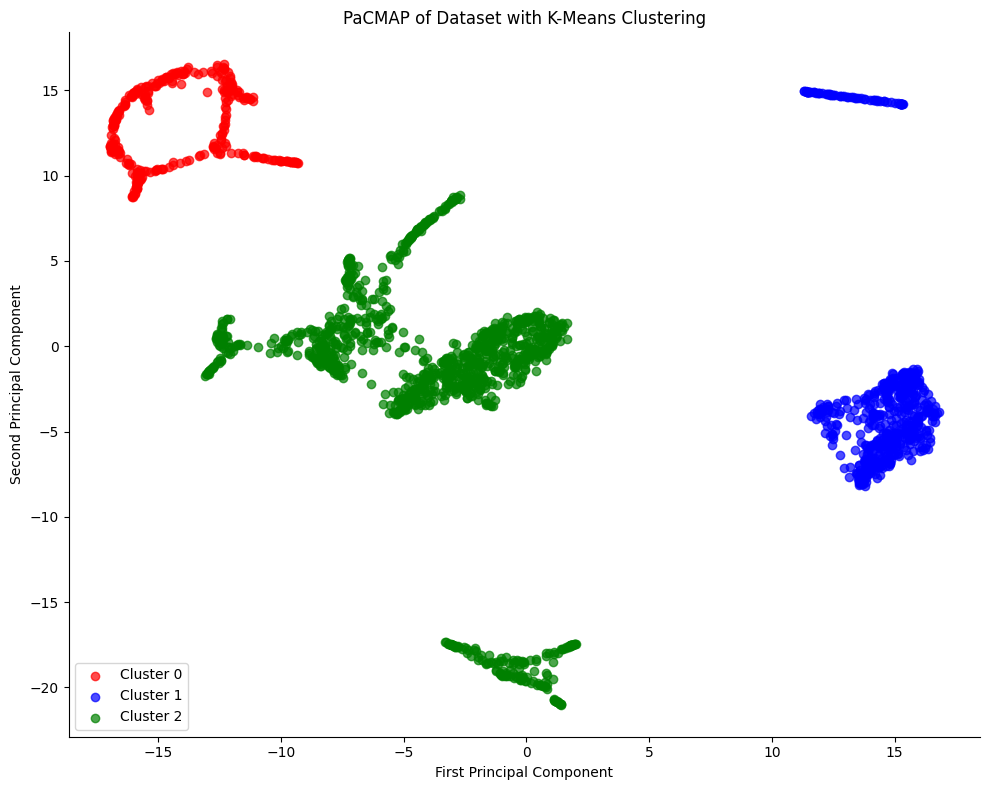

In [285]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
kmeans.fit(X_pacmap) 
cluster_labels= kmeans.labels_
centroids = kmeans.cluster_centers_

# PaCMAP and K-Means Plot
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(10, 8))
for i, cluster in enumerate(np.unique(cluster_labels)):
    plt.scatter(X_pacmap[cluster_labels == cluster, 0], 
                X_pacmap[cluster_labels == cluster, 1], 
                c=[colors[i % len(colors)]], 
                label=f'Cluster {cluster}',
                alpha=0.7)


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PaCMAP of Dataset with K-Means Clustering')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

#### Davies Bouldin Score

In [286]:
db_index = davies_bouldin_score(X_pacmap,cluster_labels)

rounded_value = round(db_index, 3)
text_to_print = "K-Means Clustering on PaCMAP-Reduced Data"

print(db_index)
print(f"The Davies Bouldin score is {rounded_value} for {text_to_print}")

0.5669334428413538
The Davies Bouldin score is 0.567 for K-Means Clustering on PaCMAP-Reduced Data


#### Silhouette Score

In [287]:
score = silhouette_score(X_pacmap,cluster_labels,metric='euclidean')
print(score)

#rounded_value1 = round(score, 3)
text_to_print = "K-Means Clustering on PaCMAP-Reduced Data"

rounded_value2 = "{:.3f}".format(score)

#print(rounded_value1)
print(f"The Silhouette score is {rounded_value2} for {text_to_print}")

0.5695116
The Silhouette score is 0.570 for K-Means Clustering on PaCMAP-Reduced Data


### HDBSCAN with PacMAP

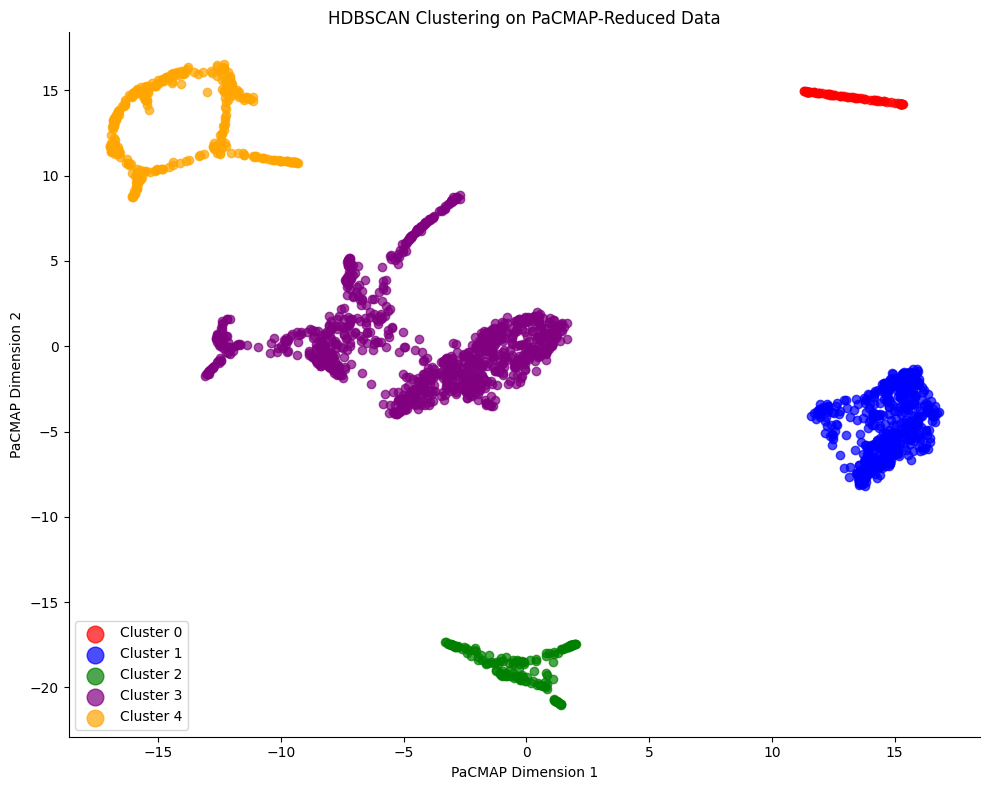

In [288]:
# HDBSCAN
clusterer = HDBSCAN(min_cluster_size=30, min_samples=50)
cluster_labels1 = clusterer.fit_predict(X_pacmap)

# PaCMAP and HDBSCAN Plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(cluster_labels1)
for i, cluster in enumerate(unique_clusters):
    if cluster == -1: 
        color = 'grey'
        label = 'Noise'
    else:
        color = colors[i % len(colors)]
        label = f'Cluster {cluster}'
    plt.scatter(X_pacmap[cluster_labels1 == cluster, 0], 
                X_pacmap[cluster_labels1 == cluster, 1], 
                c=[color], 
                label=label,
                alpha=0.7)

plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.title('HDBSCAN Clustering on PaCMAP-Reduced Data')
plt.legend(markerscale=2)
sns.despine()
plt.tight_layout()
plt.savefig('Plots/pacmap_hdbscan.png', format='png')
plt.show()

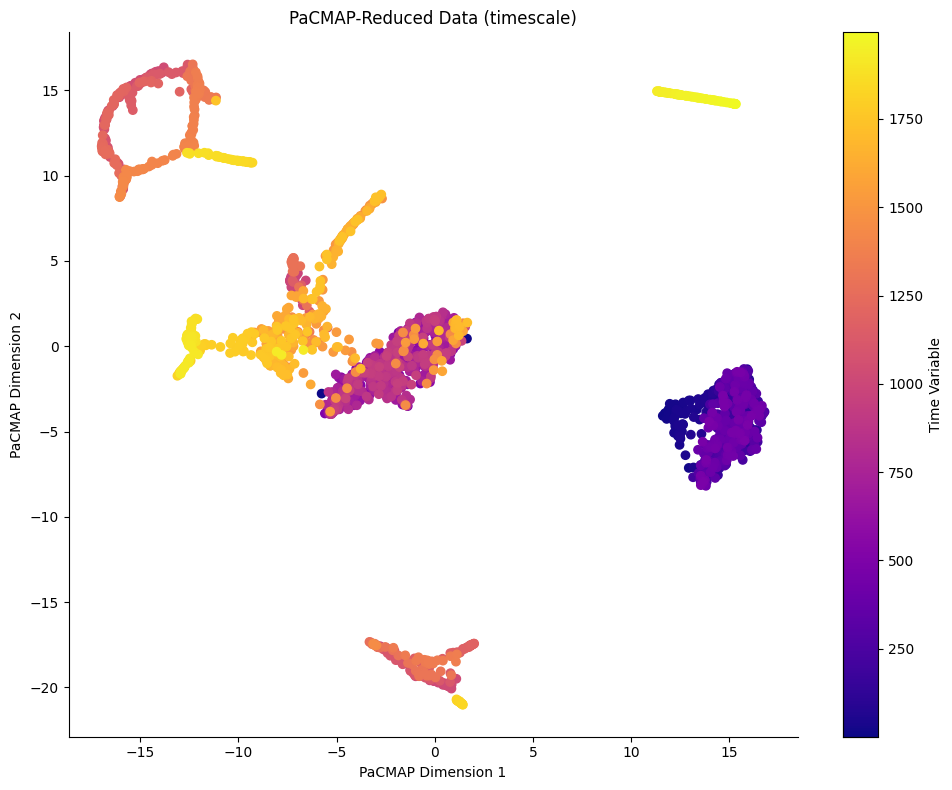

In [289]:
plt.figure(figsize=(10, 8))

plt.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=time_variable, cmap='plasma')

plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.title('PaCMAP-Reduced Data (timescale)')
plt.colorbar(label='Time Variable')
sns.despine()
plt.tight_layout()
plt.savefig('Plots/timescale_plot.png', format='png')
plt.show()

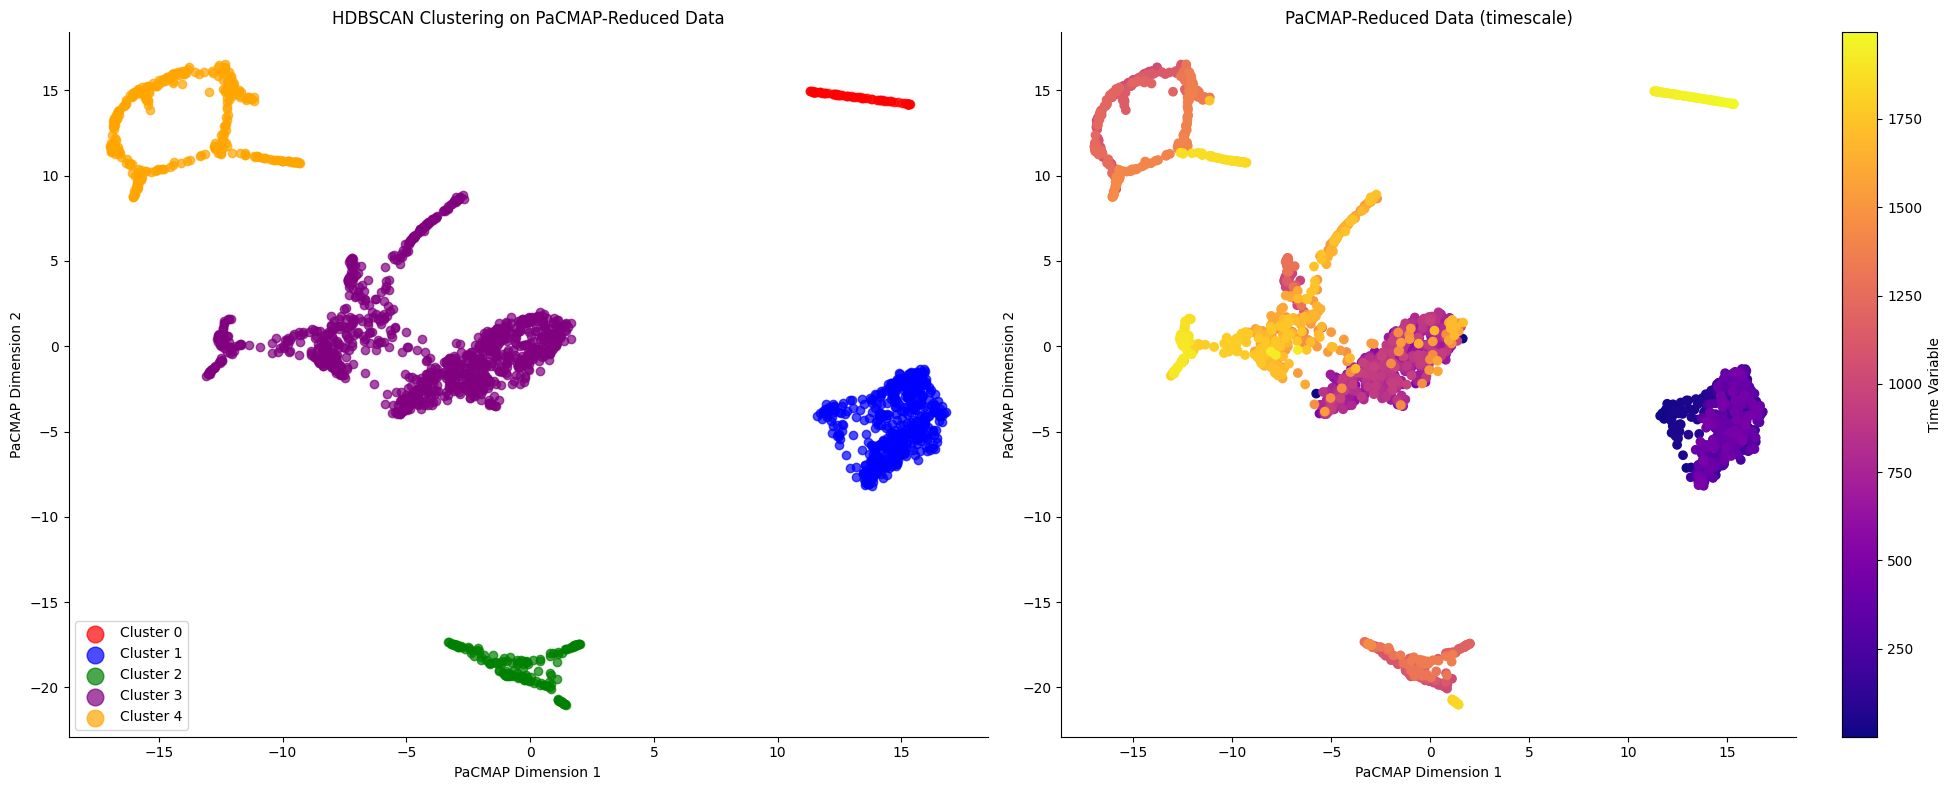

In [290]:
# Creating a figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8)) # Two subplots in one row

# First subplot: HDBSCAN Clustering
unique_clusters = np.unique(cluster_labels1)
for i, cluster in enumerate(unique_clusters):
    if cluster == -1:
        color = 'grey'
        label = 'Noise'
    else:
        color = colors[i % len(colors)]
        label = f'Cluster {cluster}'
    axes[0].scatter(X_pacmap[cluster_labels1 == cluster, 0], 
                    X_pacmap[cluster_labels1 == cluster, 1], 
                    c=[color], 
                    label=label,
                    alpha=0.7)

axes[0].set_xlabel('PaCMAP Dimension 1')
axes[0].set_ylabel('PaCMAP Dimension 2')
axes[0].set_title('HDBSCAN Clustering on PaCMAP-Reduced Data')
axes[0].legend(markerscale=2)
sns.despine()

# Second subplot: PaCMAP-Reduced Data (timescale)
sc = axes[1].scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=time_variable, cmap='plasma')
axes[1].set_xlabel('PaCMAP Dimension 1')
axes[1].set_ylabel('PaCMAP Dimension 2')
axes[1].set_title('PaCMAP-Reduced Data (timescale)')
fig.colorbar(sc, ax=axes[1], label='Time Variable')
sns.despine()

plt.tight_layout()
plt.savefig('Plots/combined_plot.png', format='png')
plt.show()

In [291]:
from sklearn.neighbors import KNeighborsClassifier

# K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pacmap, cluster_labels1)

# Feature importance scores
feature_importance = knn.kneighbors_graph(X_pacmap, mode='distance').toarray().sum(axis=0)

# Print the importance scores for each variable
print("Feature Importance Scores:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")



Feature Importance Scores:
XMEAS1: 0.20356567306304607
XMEAS2: 0.1610876974291759
XMEAS3: 1.1689396703984278
XMEAS4: 0.7217593708126779
XMEAS5: 0.7728669812832683
XMEAS6: 1.0532380033148654
XMEAS7: 1.1382519458000881
XMEAS8: 0.5919914408599557
XMEAS9: 0.30691368584104883
XMEAS10: 0.6071933990523605
XMEAS11: 0.47049420989780255
XMEAS12: 0.4537067483075712
XMEAS13: 0.7287924695156255
XMEAS14: 0.9377753866214864
XMEAS15: 0.7693356353698091
XMEAS16: 0.6969117246144664
XMEAS17: 0.47019695542021106
XMEAS18: 0.5953879588801393
XMEAS19: 0.8156063518269607
XMEAS20: 1.5039339600038404
XMEAS21: 1.146559416092782
XMEAS22: 0.9186703309281522
XMV1: 0.8916107077291269
XMV2: 1.0054764097987443
XMV3: 2.232022610439579
XMV4: 0.19745816720750073
XMV6: 0.8440859960499211
XMV7: 0.816784387653342
XMV8: 0.6408060923493859
XMV10: 0.9943419293361138
XMV11: 1.1370528889845906


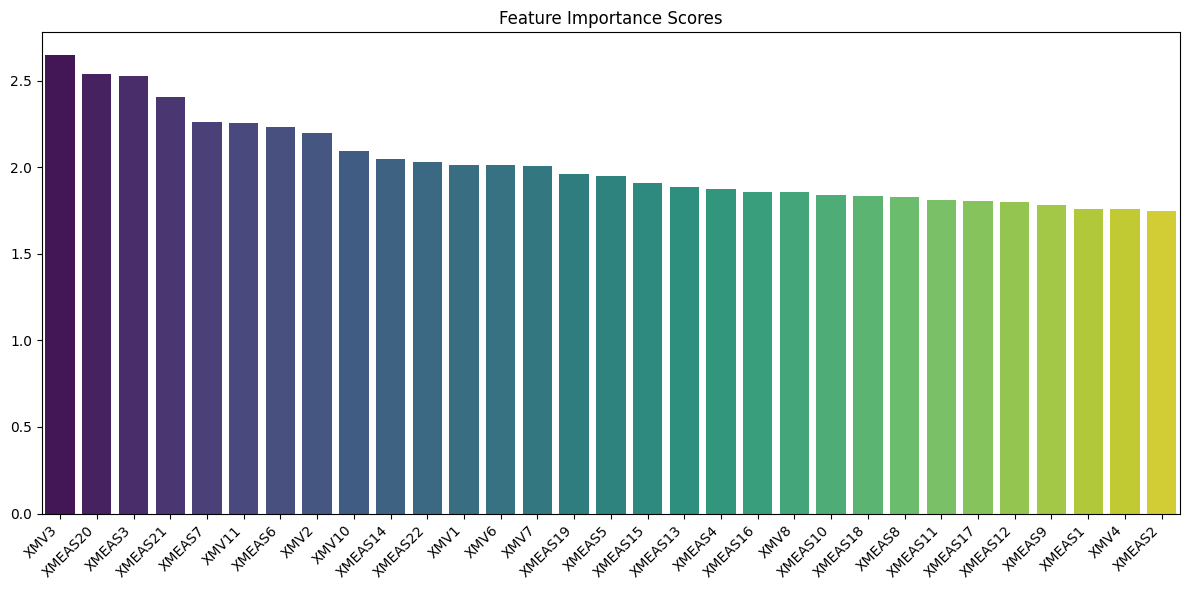

In [292]:
# Bar plot for feature importance
plt.figure(figsize=(12, 6))

# Sort features and importance scores
sorted_features = [feature for _, feature in sorted(zip(feature_importance, X.columns), reverse=True)]
sorted_importance = sorted(feature_importance, reverse=True)

# Check if each sorted feature is present in the original dataframe
valid_sorted_features = [feature for feature in sorted_features if feature in X.columns]

sns.barplot(x=valid_sorted_features, y=sorted_importance[:len(valid_sorted_features)], palette='viridis')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


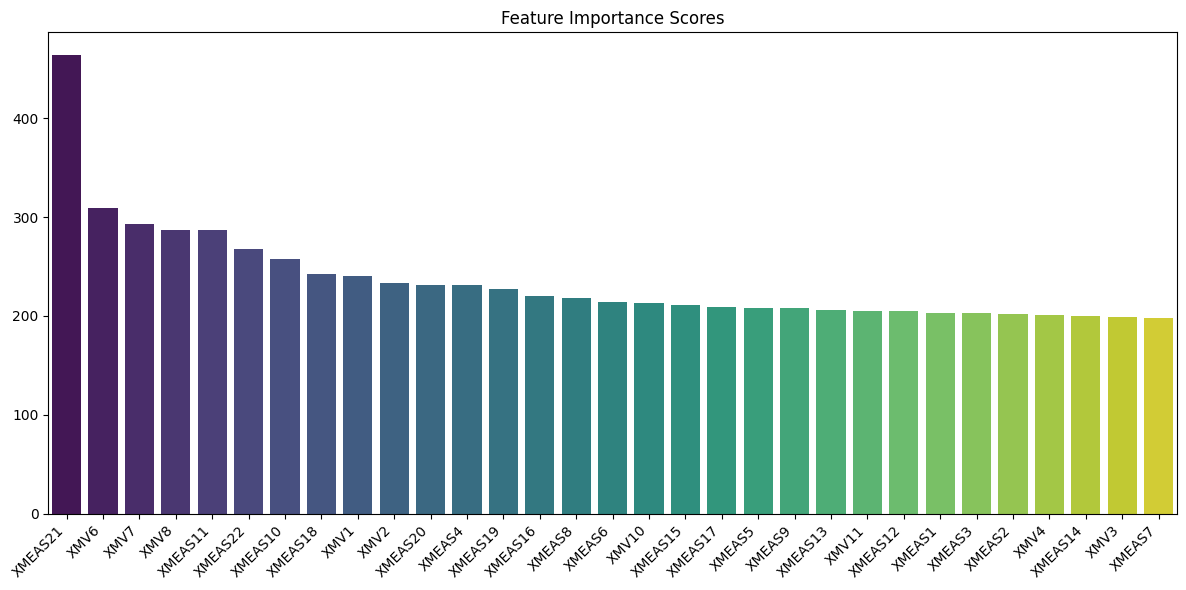

In [293]:
# K-nearest neighbors on the original features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, cluster_labels1)

# Feature importance scores
feature_importance = knn.kneighbors_graph(X, mode='distance').toarray().sum(axis=0)

# Bar plot for feature importance
plt.figure(figsize=(12, 6))

# Sort features and importance scores
sorted_features = [feature for _, feature in sorted(zip(feature_importance, X.columns), reverse=True)]
sorted_importance = sorted(feature_importance, reverse=True)

# Check if each sorted feature is present in the original dataframe
valid_sorted_features = [feature for feature in sorted_features if feature in X.columns]

sns.barplot(x=valid_sorted_features, y=sorted_importance[:len(valid_sorted_features)], palette='viridis')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

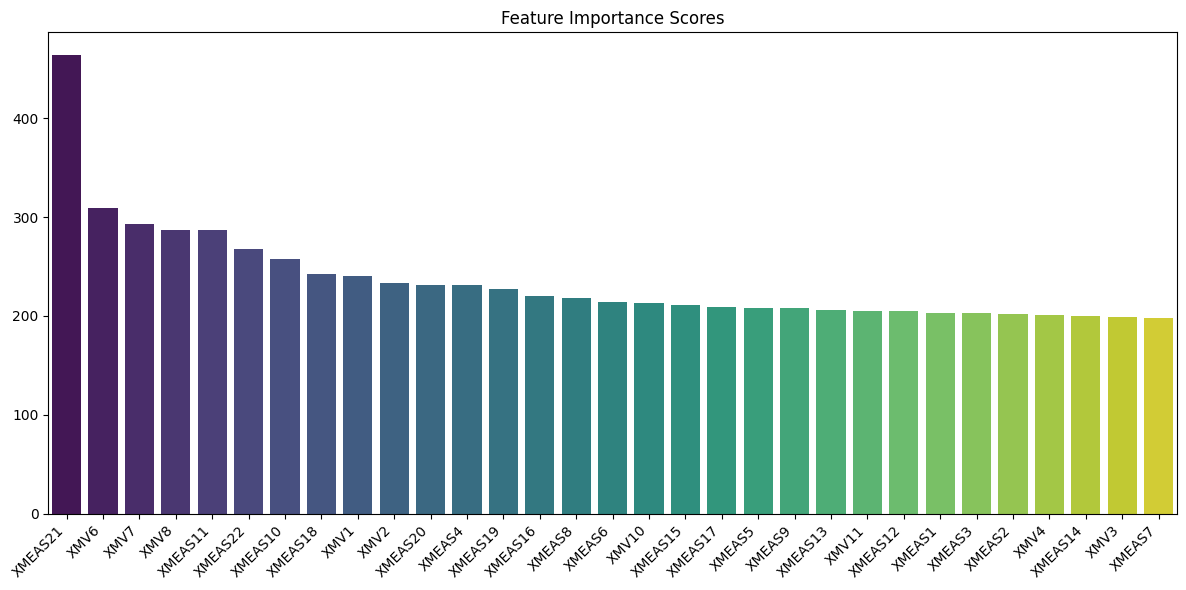

Number of data points in each cluster:
3    984
1    471
4    316
2    156
0     68
Name: count, dtype: int64


In [294]:
# K-nearest neighbors on the original features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, cluster_labels1)

# Feature importance scores
feature_importance = knn.kneighbors_graph(X, mode='distance').toarray().sum(axis=0)

# Bar plot for feature importance
plt.figure(figsize=(12, 6))

# Sort features and importance scores
sorted_features = [feature for _, feature in sorted(zip(feature_importance, X.columns), reverse=True)]
sorted_importance = sorted(feature_importance, reverse=True)

# Check if each sorted feature is present in the original dataframe
valid_sorted_features = [feature for feature in sorted_features if feature in X.columns]

sns.barplot(x=valid_sorted_features, y=sorted_importance[:len(valid_sorted_features)], palette='viridis')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count the number of data points in each cluster
cluster_counts = pd.Series(cluster_labels1).value_counts()

# Print the number of data points in each cluster
print("Number of data points in each cluster:")
print(cluster_counts)

#### Davies Bouldin Score

In [295]:
db_index = davies_bouldin_score(X_pacmap,cluster_labels1)

rounded_value2 = "{:.3f}".format(db_index)
text_to_print = "HBDSCAN Clustering on PaCMAP-Reduced Data"

print(db_index)
print(f"The Davies Bouldin score is {rounded_value2} for {text_to_print}")

0.35941382791351845
The Davies Bouldin score is 0.359 for HBDSCAN Clustering on PaCMAP-Reduced Data


#### Silhouette Score

In [296]:
score = silhouette_score(X_pacmap,cluster_labels1,metric='euclidean')

rounded_value = "{:.3f}".format(score)
text_to_print = "HBDSCAN Clustering on PaCMAP-Reduced Data"

print(score)
print(f"The Silhouette score is {rounded_value} for {text_to_print}")

0.7178199
The Silhouette score is 0.718 for HBDSCAN Clustering on PaCMAP-Reduced Data


### K-Means with PCA

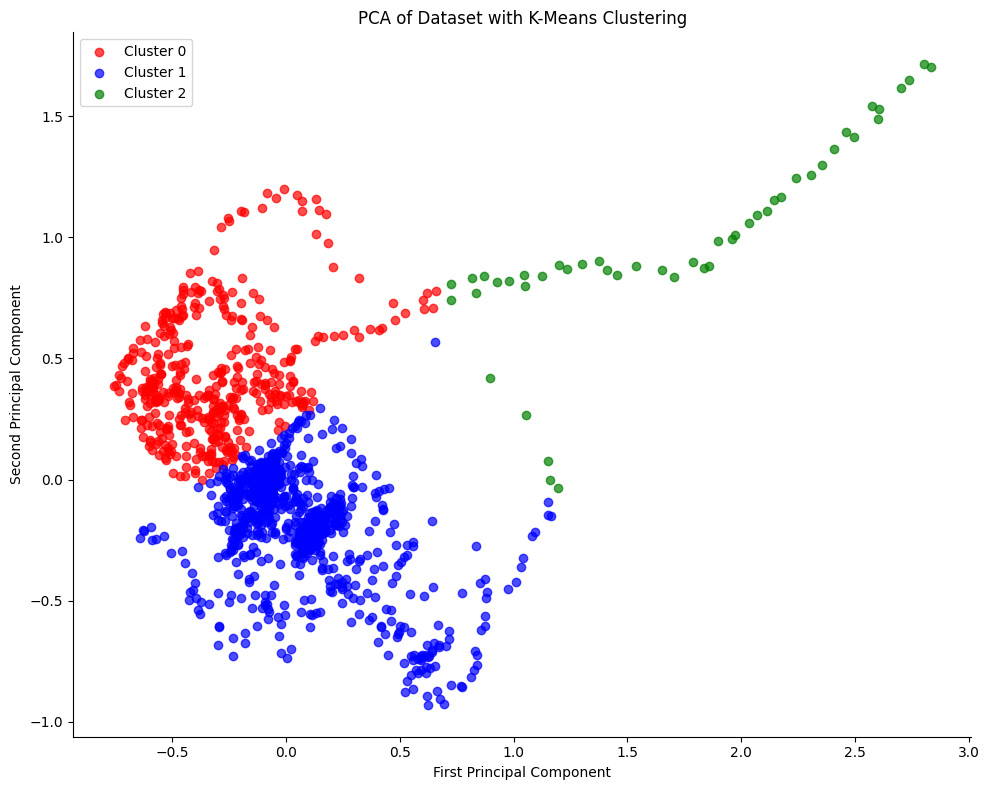

In [297]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)
kmeans.fit(X_pca) 
cluster_labels_pca= kmeans.labels_
centroids = kmeans.cluster_centers_

# PaCMAP and K-Means Plot
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(10, 8))
for i, cluster in enumerate(np.unique(cluster_labels)):
    plt.scatter(X_pca[cluster_labels_pca == cluster, 0], 
                X_pca[cluster_labels_pca == cluster, 1], 
                c=[colors[i % len(colors)]], 
                label=f'Cluster {cluster}',
                alpha=0.7)


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset with K-Means Clustering')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

#### Davies Bouldin Score

In [298]:
db_index = davies_bouldin_score(X_pca,cluster_labels_pca)

rounded_value = round(db_index, 3)
text_to_print = "K-Means Clustering on PCA-Reduced Data"

print(db_index)
print(f"The Davies Bouldin score is {rounded_value} for {text_to_print}")

0.7062545879351632
The Davies Bouldin score is 0.706 for K-Means Clustering on PCA-Reduced Data


#### Silhouette Score

In [299]:
score = silhouette_score(X_pca,cluster_labels_pca,metric='euclidean')

rounded_value = round(score, 3)
text_to_print = "K-Means Clustering on PCA-Reduced Data"

print(score)
print(f"The Silhouette score is {rounded_value} for {text_to_print}")


0.5163901690383459
The Silhouette score is 0.516 for K-Means Clustering on PCA-Reduced Data


### HDBSCAN with PCA

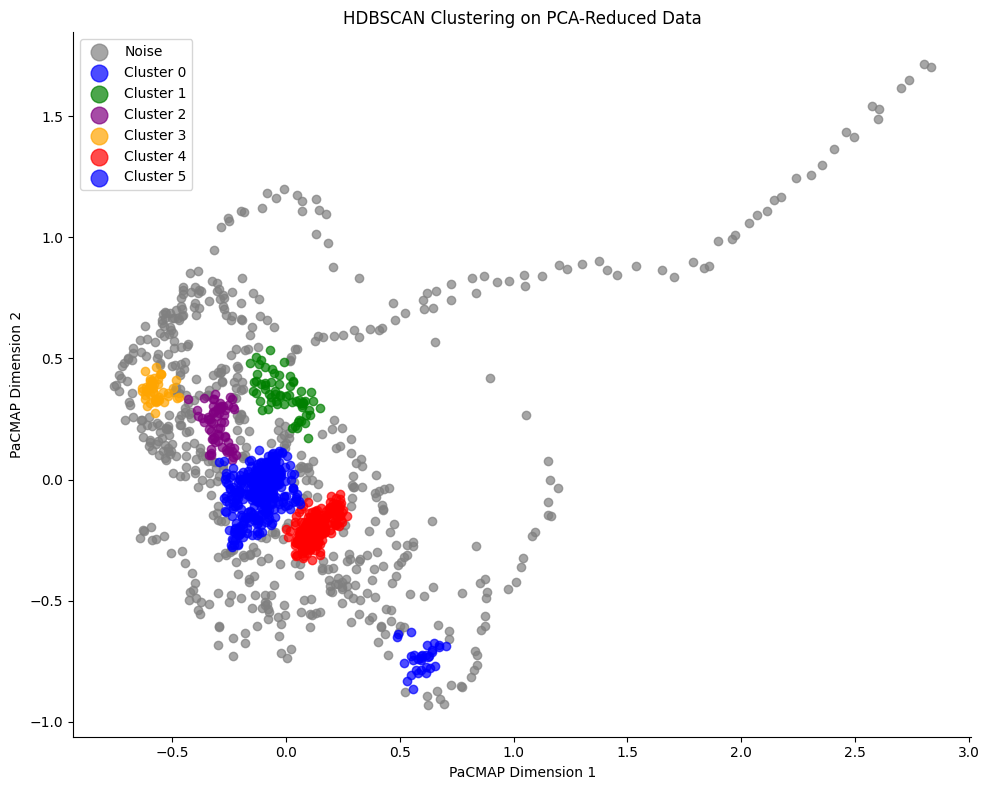

In [300]:
# HDBSCAN
clusterer = HDBSCAN(min_cluster_size=30, min_samples=20)
cluster_labels1PCA = clusterer.fit_predict(X_pca)

# PaCMAP and HDBSCAN Plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(cluster_labels1PCA)
for i, cluster in enumerate(unique_clusters):
    if cluster == -1: 
        color = 'grey'
        label = 'Noise'
    else:
        color = colors[i % len(colors)]
        label = f'Cluster {cluster}'
    plt.scatter(X_pca[cluster_labels1PCA == cluster, 0], 
                X_pca[cluster_labels1PCA == cluster, 1], 
                c=[color], 
                label=label,
                alpha=0.7)

plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.title('HDBSCAN Clustering on PCA-Reduced Data')
plt.legend(markerscale=2)
sns.despine()
plt.tight_layout()
plt.show()

#### Davies Bouldin Score

In [301]:
db_index = davies_bouldin_score(X_pca,cluster_labels1PCA)

rounded_value = "{:.3f}".format(db_index)
text_to_print = "HDBSCAN Clustering on PaCMAP-Reduced Data"

print(db_index)
print(f"The Davies Bouldin score is {rounded_value} for {text_to_print}")

2.4496494351847233
The Davies Bouldin score is 2.450 for HDBSCAN Clustering on PaCMAP-Reduced Data


#### Silhouette Score

In [302]:
score = silhouette_score(X_pca,cluster_labels1PCA,metric='euclidean')

rounded_value = round(score, 3)
text_to_print = "HDBSCAN Clustering on PaCMAP-Reduced Data"

print(score)
print(f"The Silhouette score is {rounded_value} for {text_to_print}")

0.3023800629682325
The Silhouette score is 0.302 for HDBSCAN Clustering on PaCMAP-Reduced Data
